In [175]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import Series,DataFrame
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

# 1)- Load the data into the pandas environment and identify some basic details of the dataset.

In [176]:
data=pd.read_csv("E:/Python programming/WK#9/employee.csv")

In [177]:
data

,name,age,income,gender,department,grade,performance_score
0,Allen Smith,45.0,NaN,NaN,Operations,G3,723
1,S Kumar,NaN,16000.0,F,Finance,G0,520
2,Jack Morgan,32.0,35000.0,M,Finance,G2,674
3,Ying Chin,45.0,65000.0,F,Sales,G3,556
4,Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
5,Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
6,James Authur,54.0,NaN,F,Operations,G3,53
7,Josh Wills,54.0,52000.0,F,Finance,G3,901
8,Leo Duck,23.0,98000.0,M,Sales,G4,709


In [178]:
data.shape

(9, 7)

In [179]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               9 non-null      object 
 1   age                7 non-null      float64
 2   income             7 non-null      float64
 3   gender             7 non-null      object 
 4   department         9 non-null      object 
 5   grade              9 non-null      object 
 6   performance_score  9 non-null      int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 632.0+ bytes


In [180]:
data.isnull().sum()

name                 0
age                  2
income               2
gender               2
department           0
grade                0
performance_score    0
dtype: int64

# 2)- Reset the index as "name".

In [181]:
data.set_index('name',inplace=True)
data

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,NaN,NaN,Operations,G3,723
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
James Authur,54.0,NaN,F,Operations,G3,53
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


# 3)- Select rows for specific names Jack Morgan and Josh wills

In [182]:
data.loc[["Jack Morgan","Josh Wills"]]

,age,income,gender,department,grade,performance_score
name,,,,,,
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Josh Wills,54.0,52000.0,F,Finance,G3,901


# 4)- Select data for multiple values "Sales" and “Finance”

In [183]:
data[data['department'].isin(["Sales","Finance"])]

,age,income,gender,department,grade,performance_score
name,,,,,,
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


# 5)- Display employee who has more than 700 performance score

In [184]:
pf_score_700 = data[data["performance_score"] > 700]
pf_score_700

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,NaN,NaN,Operations,G3,723
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


# 6)- Display employee who has more than 500 and less than 700 performance score

In [185]:
emp_score = data[(data["performance_score"] > 500) & (data["performance_score"] < 700)]
emp_score

,age,income,gender,department,grade,performance_score
name,,,,,,
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649


# 7)- Check and handle missing values in the dataset

In [186]:
data.isnull().sum()

age                  2
income               2
gender               2
department           0
grade                0
performance_score    0
dtype: int64

In [187]:
mean_age= data['age'].median()
data['age'].fillna(value= mean_age, inplace= True)
data

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,NaN,NaN,Operations,G3,723
S Kumar,45.0,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Satyam Sharma,45.0,62000.0,NaN,Sales,G3,649
James Authur,54.0,NaN,F,Operations,G3,53
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


In [188]:
mean_income= data['income'].mean()
data['income'].fillna(value= mean_income, inplace= True)
data

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,52857.142857,NaN,Operations,G3,723
S Kumar,45.0,16000.000000,F,Finance,G0,520
Jack Morgan,32.0,35000.000000,M,Finance,G2,674
Ying Chin,45.0,65000.000000,F,Sales,G3,556
Dheeraj Patel,30.0,42000.000000,F,Operations,G2,711
Satyam Sharma,45.0,62000.000000,NaN,Sales,G3,649
James Authur,54.0,52857.142857,F,Operations,G3,53
Josh Wills,54.0,52000.000000,F,Finance,G3,901
Leo Duck,23.0,98000.000000,M,Sales,G4,709


In [189]:
data['gender'].fillna(data['gender'].mode()[0], inplace= True)
data

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,52857.142857,F,Operations,G3,723
S Kumar,45.0,16000.000000,F,Finance,G0,520
Jack Morgan,32.0,35000.000000,M,Finance,G2,674
Ying Chin,45.0,65000.000000,F,Sales,G3,556
Dheeraj Patel,30.0,42000.000000,F,Operations,G2,711
Satyam Sharma,45.0,62000.000000,F,Sales,G3,649
James Authur,54.0,52857.142857,F,Operations,G3,53
Josh Wills,54.0,52000.000000,F,Finance,G3,901
Leo Duck,23.0,98000.000000,M,Sales,G4,709


In [190]:
data.isna().sum()

age                  0
income               0
gender               0
department           0
grade                0
performance_score    0
dtype: int64

Now all missing values are filled using median,mean and mode

# 8)- Check the outliers and handle outliers in performance score using Percentiles

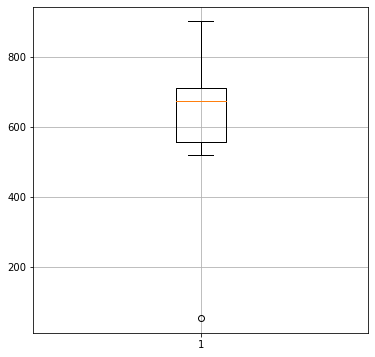

In [191]:
plt.figure(figsize=(6,6))
plt.boxplot(data["performance_score"])
plt.grid()

In [192]:
Q1= np.percentile(data['performance_score'],25)
Q3= np.percentile(data['performance_score'],75)
IQR=Q3-Q1
low_lmt = Q1-1.5*IQR
up_lmt = Q3+1.5*IQR
outlier=[]
for i in data['performance_score']:
    if((i<low_lmt) or (i>up_lmt)):
        outlier.append(i)
print("First Quartile :", Q1)
print("Third Quartile :", Q3)
print("IQR :", IQR)
print("Lower limit :",low_lmt)
print("Upper limit :",up_lmt)
print("Outlier is :", outlier)

First Quartile : 556.0
Third Quartile : 711.0
IQR : 155.0
Lower limit : 323.5
Upper limit : 943.5
Outlier is : [53]


In [193]:
outlier_data = (data['performance_score']<low_lmt)
outlier_data = data.loc[outlier_data ].index
data.loc[list(outlier_data ),'performance_score']=data['performance_score'].mean()
data

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,52857.142857,F,Operations,G3,723.000000
S Kumar,45.0,16000.000000,F,Finance,G0,520.000000
Jack Morgan,32.0,35000.000000,M,Finance,G2,674.000000
Ying Chin,45.0,65000.000000,F,Sales,G3,556.000000
Dheeraj Patel,30.0,42000.000000,F,Operations,G2,711.000000
Satyam Sharma,45.0,62000.000000,F,Sales,G3,649.000000
James Authur,54.0,52857.142857,F,Operations,G3,610.666667
Josh Wills,54.0,52000.000000,F,Finance,G3,901.000000
Leo Duck,23.0,98000.000000,M,Sales,G4,709.000000


# 9)- Check the gender column and do Dummy encoding

In [194]:
dummy_data = pd.get_dummies(data, columns=["gender"])
dummy_data

,age,income,department,grade,performance_score,gender_F,gender_M
name,,,,,,,
Allen Smith,45.0,52857.142857,Operations,G3,723.000000,1,0
S Kumar,45.0,16000.000000,Finance,G0,520.000000,1,0
Jack Morgan,32.0,35000.000000,Finance,G2,674.000000,0,1
Ying Chin,45.0,65000.000000,Sales,G3,556.000000,1,0
Dheeraj Patel,30.0,42000.000000,Operations,G2,711.000000,1,0
Satyam Sharma,45.0,62000.000000,Sales,G3,649.000000,1,0
James Authur,54.0,52857.142857,Operations,G3,610.666667,1,0
Josh Wills,54.0,52000.000000,Finance,G3,901.000000,1,0
Leo Duck,23.0,98000.000000,Sales,G4,709.000000,0,1


# 10)- Do the standard scaling on the feature performance score.

In [195]:
scaler =preprocessing. StandardScaler()
StdScale = pd.DataFrame(data['performance_score'])
StdScale = scaler.fit_transform(StdScale)
StdScale = pd.DataFrame(StdScale)
StdScale.describe()

,0
count,9.000000e+00
mean,6.599659e-16
std,1.060660e+00
min,-1.456862e+00
25%,-5.914416e-01
50%,1.308030e-02
75%,3.662484e-01
max,2.179814e+00
